# <font color='red'>1. Data Preprocessing </font>

### 1.1 Read CSV

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 


In [ ]:
df=pd.read_csv("insuranceFraud.csv")

In [ ]:
pd.set_option("display.max_columns",39)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2/22/2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,1/24/2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,1/23/2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2/26/2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


### 1.2 Drop Unecessary Column 

In [ ]:
# list of columns[12] not necessary for prediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [ ]:
# dropping the unnecessary columns
df.drop(columns=cols_to_drop,inplace=True)

### 1.3 Check Columns data types 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

### there is 27 column in dataset in that 15 numerical and 12 categorical 

### 1.4 Check Null values

In [ ]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

### 1.5 Check Unique Value of all 12 Categorical columns 

In [ ]:
df["collision_type"].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [ ]:
df["policy_csl"].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [ ]:
df["insured_sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [ ]:
df["insured_education_level"].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [ ]:
df["insured_occupation"].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [ ]:
df["insured_relationship"].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [ ]:
df["incident_type"].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [ ]:
df["incident_severity"].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [ ]:
df["authorities_contacted"].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [ ]:
df["property_damage"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [ ]:
df["police_report_available"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [ ]:
df["fraud_reported"].unique()

array(['Y', 'N'], dtype=object)

### In this dataset [collision type, property damage, police_report_available] categorcal columns present missing value 

### 1.6 Replacing missing values with most frequent value

In [ ]:
df["collision_type"].value_counts()["Side Collision"]

276

In [ ]:
df["collision_type"].value_counts()["Rear Collision"]

292

In [ ]:
df["collision_type"].value_counts()["Front Collision"]

254

In [ ]:
# Replace ? with null value
df['collision_type'] = df['collision_type'].replace('?','Rear Collision')

In [ ]:
pd.set_option("display.max_columns",40)
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [ ]:
df["property_damage"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [ ]:
df["property_damage"].value_counts()["YES"]

302

In [ ]:
df["property_damage"].value_counts()["NO"]

338

In [ ]:
# Replace ? with null value
df['property_damage'] = df['property_damage'].replace('?','NO')

In [ ]:
pd.set_option("display.max_columns",40)
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [ ]:
df["police_report_available"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [ ]:
df["police_report_available"].value_counts()["YES"]

314

In [ ]:
df["police_report_available"].value_counts()["NO"]

343

In [ ]:
# Replace ? with null value
df['police_report_available'] = df['police_report_available'].replace('?','NO')

In [ ]:
# check the data after replacing missing value from coulmns 
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,8,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


### 1.7 Extracting the categorical columns

In [ ]:
cat_df = df.select_dtypes(include=['object']).copy()

In [ ]:
cat_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [ ]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


### 1.8 Encoding Categorical columns 

In [ ]:
# custom mapping for encoding [7]
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [ ]:
# auto encoding of categorical variables [5]
for col in cat_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

In [ ]:
# data fter encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


### 1.9 Check the datatypes after encoding 

In [ ]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   policy_csl                              1000 non-null   float64
 1   insured_sex                             1000 non-null   int64  
 2   insured_education_level                 1000 non-null   int64  
 3   incident_severity                       1000 non-null   int64  
 4   property_damage                         1000 non-null   int64  
 5   police_report_available                 1000 non-null   int64  
 6   fraud_reported                          1000 non-null   int64  
 7   insured_occupation_armed-forces         1000 non-null   uint8  
 8   insured_occupation_craft-repair         1000 non-null   uint8  
 9   insured_occupation_exec-managerial      1000 non-null   uint8  
 10  insured_occupation_farming-fishing      1000 non-null   uint8

### 1.10 Extracting the numerical columns

In [ ]:
num_df = df.select_dtypes(include=['int64']).copy()

In [ ]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [ ]:
num_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


### 1.11 combining the Numerical and categorical dataframes

In [ ]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [ ]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,...,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080,2.5,1,6,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510,2.5,1,6,2,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,1.0,0,7,2,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2.5,0,7,3,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,5.0,1,5,2,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


### 1.12 separating the feature and target columns

In [ ]:
# separating the feature and target columns
x=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

### 1.13 Finding Outliers

<AxesSubplot: >

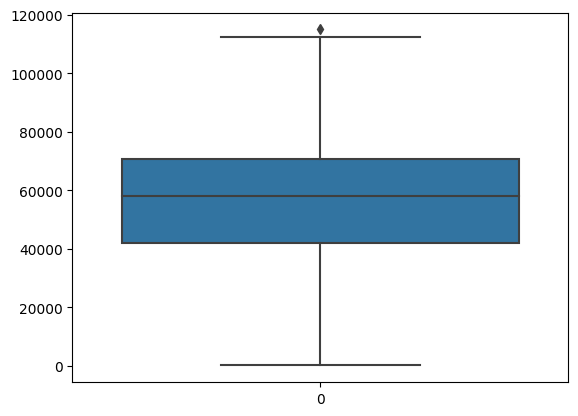

In [ ]:
import seaborn as sns
sns.boxplot(final_df['total_claim_amount'])

# <font color='red'>2. Data visualization</font>

### 2.1 Distribution of data 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib  inline

(array([178.,   2.,  27.,  87., 194., 229., 173.,  78.,  23.,   9.]),
 array([1.00000e+02, 1.15820e+04, 2.30640e+04, 3.45460e+04, 4.60280e+04,
        5.75100e+04, 6.89920e+04, 8.04740e+04, 9.19560e+04, 1.03438e+05,
        1.14920e+05]),
 <BarContainer object of 10 artists>)

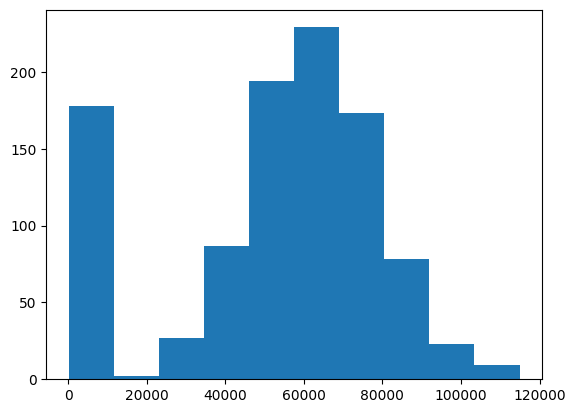

In [ ]:
plt.hist(final_df['total_claim_amount'])

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

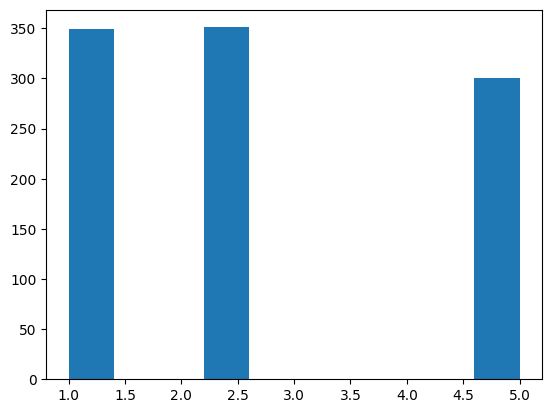

In [ ]:
# we'll look at the distribution of data in some columns now
plt.hist(final_df['policy_csl'])
# we  can see that for almost all categories of CSL the data is uniformly distributed

In [ ]:
import seaborn as sns

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_23744\2026876302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['insured_sex'],color='purple')


<AxesSubplot: xlabel='insured_sex', ylabel='Density'>

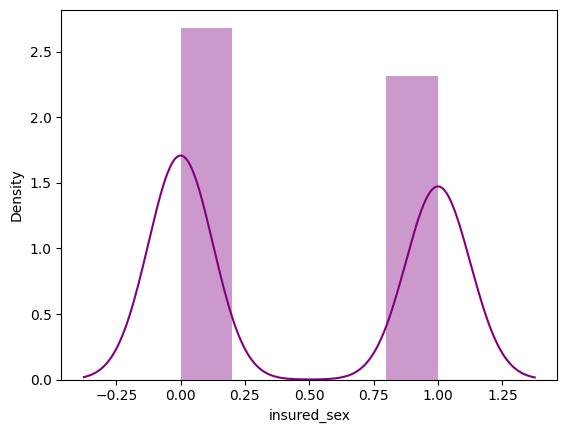

In [ ]:
sns.distplot(final_df['insured_sex'],color='purple')
# we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_23744\34127092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['insured_education_level'],color='purple')


<AxesSubplot: xlabel='insured_education_level', ylabel='Density'>

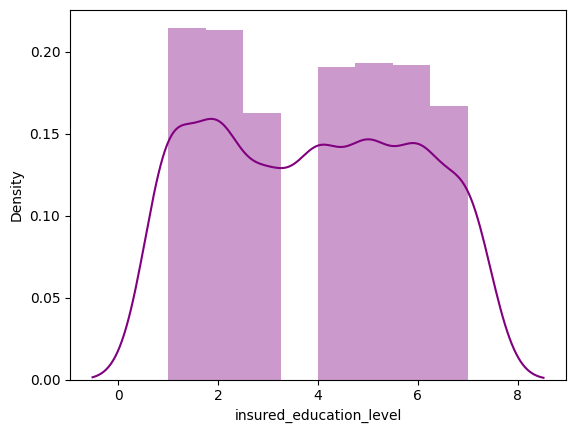

In [ ]:
sns.distplot(final_df['insured_education_level'],color='purple')
# we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

C:\Users\Pankaj\AppData\Local\Temp\ipykernel_23744\3277367395.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['incident_severity'],color='purple')


'\nWe can see that there are least claims for trivial incidents,\nmost claims for minor incidents,\nand for major and Total loss incidents the claims are almost equal.\n'

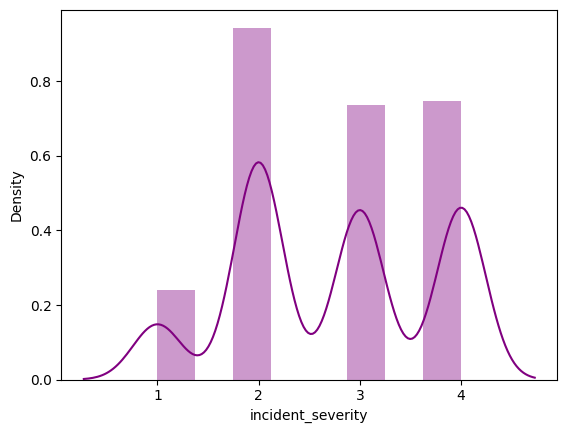

In [ ]:
sns.distplot(final_df['incident_severity'],color='purple')
"""
We can see that there are least claims for trivial incidents,
most claims for minor incidents,
and for major and Total loss incidents the claims are almost equal.
"""

In [ ]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

### 2.2 Correlation between independant columns using heatmap

<AxesSubplot: >

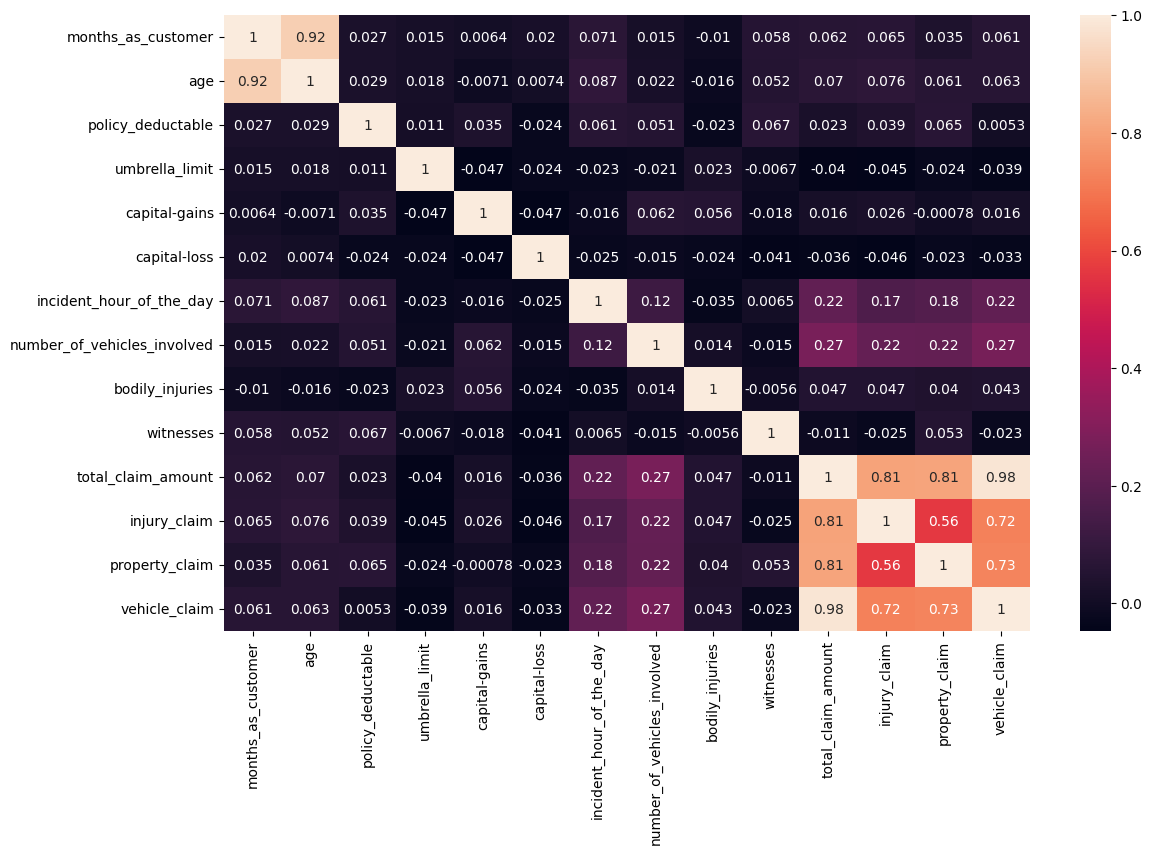

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )

In [ ]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [ ]:
x.drop(columns=['age','total_claim_amount'], inplace=True)

# <font color='red'>3. Splitting Data into Train and test</font>

In [ ]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y, random_state=355 )

In [ ]:
train_x

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,...,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,6860,61740,1.0,0,6,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
244,95,1000,0,0,-70300,3,1,1,2,640,320,2240,2.5,1,5,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0
595,56,500,0,0,-28800,13,1,1,2,0,6500,52000,1.0,1,1,3,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1
873,322,2000,0,0,-46000,18,1,0,2,7680,7680,26880,2.5,0,7,3,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
631,147,1000,6000000,0,-48400,2,2,1,2,9760,4880,39040,5.0,0,5,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,59,2000,0,64200,-32300,0,3,0,2,5730,11460,34380,2.5,1,3,4,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
501,26,1000,0,0,-53700,0,1,0,2,9960,4980,34860,2.5,1,4,3,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
346,429,1000,6000000,67400,-43800,0,1,2,0,6580,6580,26320,2.5,1,5,2,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
642,143,1000,0,79900,0,1,1,2,0,5660,5660,50940,5.0,0,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


# <font color='red'>4. Data Scaling using StandardScaler</font>

In [ ]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaled_data=scaler.fit_transform(train_x)
scaled_train= pd.DataFrame(data=scaled_data, columns=train_x.columns,index=train_x.index)
scaled_train.shape

(750, 45)

In [ ]:
scaled_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,...,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,0.435244,-1.037803,-0.468878,0.385876,0.975789,-0.819548,1.162385,1.271286,0.43186,1.285251,-0.128241,1.270329,-1.078736,-0.937923,1.057325,-0.784152,1.484967,-0.681795,-0.258566,-0.292205,...,-0.284063,-0.305441,-0.258566,-0.292205,-0.286794,-0.272944,-0.460034,2.236068,-0.466404,-0.407931,-0.429923,-0.302825,-0.839372,-0.313204,-0.925438,-0.631865,-0.553733,-0.31063,-0.497916,-0.625672
244,-0.930728,-0.209769,-0.468878,-0.904442,-1.546393,-1.248282,-0.812221,0.034626,0.43186,-1.393623,-1.490999,-1.909700,-0.163519,1.066186,0.558587,-1.830618,1.484967,-0.681795,3.867486,-0.292205,...,-0.284063,-0.305441,-0.258566,-0.292205,-0.286794,-0.272944,-0.460034,2.236068,-0.466404,-0.407931,-0.429923,-0.302825,-0.839372,3.192809,1.080569,-0.631865,-0.553733,3.21926,-0.497916,-0.625672
595,-1.265778,-1.037803,-0.468878,-0.904442,-0.057480,0.180830,-0.812221,0.034626,0.43186,-1.524700,-0.203255,0.749767,-1.078736,1.066186,-1.436366,0.262314,1.484967,1.466718,-0.258566,-0.292205,...,-0.284063,-0.305441,-0.258566,-0.292205,-0.286794,-0.272944,-0.460034,-0.447214,2.144065,-0.407931,-0.429923,-0.302825,1.191367,-0.313204,1.080569,-0.631865,-0.553733,-0.31063,-0.497916,1.598281
873,1.019433,1.446300,-0.468878,-0.904442,-0.674572,0.895386,-0.812221,-1.202033,0.43186,0.048217,0.042625,-0.592794,-0.163519,-0.937923,1.556063,0.262314,-0.673415,1.466718,3.867486,-0.292205,...,-0.284063,-0.305441,-0.258566,-0.292205,-0.286794,-0.272944,-0.460034,-0.447214,2.144065,-0.407931,-0.429923,-0.302825,1.191367,-0.313204,1.080569,-0.631865,-0.553733,-0.31063,-0.497916,-0.625672
631,-0.483995,-0.209769,2.171861,-0.904442,-0.760678,-1.391193,0.175082,0.034626,0.43186,0.474215,-0.540819,0.057108,1.361843,-0.937923,0.558587,1.308780,-0.673415,-0.681795,-0.258566,-0.292205,...,-0.284063,3.273950,-0.258566,-0.292205,-0.286794,-0.272944,-0.460034,-0.447214,-0.466404,-0.407931,-0.429923,-0.302825,-0.839372,-0.313204,1.080569,-0.631865,-0.553733,-0.31063,2.008372,-0.625672


In [ ]:
test_x

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,...,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
381,47,500,0,64800,-24300,23,1,1,3,11440,5720,45760,5.0,0,7,2,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
732,96,2000,0,10000,0,9,1,2,3,7120,14240,56960,2.5,0,5,4,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
179,235,500,4000000,0,-31700,1,1,2,1,450,900,3600,1.0,1,6,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
845,147,2000,0,0,0,11,3,0,1,6240,6240,43680,5.0,0,4,3,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
111,453,500,6000000,52600,-38800,0,1,0,0,14000,7000,49000,1.0,1,7,3,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,436,2000,5000000,47400,-27600,10,1,0,2,11980,5990,41930,2.5,1,7,3,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
965,80,1000,0,64600,0,12,1,0,0,9040,9040,72320,1.0,1,4,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
591,43,500,0,0,0,16,1,2,1,7270,21810,50890,5.0,0,5,3,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
176,155,500,0,0,0,1,1,1,1,8560,8560,59920,1.0,1,4,2,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
test_data_withoutscale=test_x.filter(['incident_severit','bodily_injuries','insured_occupation_sales','property_claim','insured_occupation_farming-fishing','injury_claim','insured_occupation_tech-support','policy_deductable','capital-loss','incident_type_Parked Car','insured_occupation_machine-op-inspct','collision_type_Rear Collision','insured_relationship_wife','insured_relationship_other-relative'],axis=1)
test_data_withoutscale

,bodily_injuries,insured_occupation_sales,property_claim,insured_occupation_farming-fishing,injury_claim,insured_occupation_tech-support,policy_deductable,capital-loss,incident_type_Parked Car,insured_occupation_machine-op-inspct,collision_type_Rear Collision,insured_relationship_wife,insured_relationship_other-relative
381,1,0,5720,0,11440,0,500,-24300,0,0,0,0,1
732,2,0,14240,0,7120,0,2000,0,0,0,0,0,0
179,2,0,900,0,450,1,500,-31700,0,0,1,1,0
845,0,0,6240,0,6240,0,2000,0,0,0,0,0,0
111,0,0,7000,0,14000,0,500,-38800,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0,0,5990,0,11980,1,2000,-27600,0,0,1,0,1
965,0,0,9040,0,9040,0,1000,0,0,0,0,0,1
591,2,0,21810,0,7270,0,500,0,0,0,1,0,0
176,1,0,8560,0,8560,0,500,0,0,0,0,0,1


In [ ]:
scaled_data=scaler.fit_transform(test_x)
scaled_test= pd.DataFrame(data=scaled_data, columns=test_x.columns,index=test_x.index)
scaled_test.shape

(250, 45)

In [ ]:
scaled_test.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,...,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
381,-1.431929,-1.048430,-0.510987,1.385166,0.044644,1.712490,-0.859484,-0.061228,1.424485,0.830272,-0.297274,0.410948,1.562092,-0.900885,1.532628,-0.744116,1.635992,-0.660895,-0.31063,-0.252646,...,-0.252646,-0.302825,-0.261488,-0.270114,-0.302825,-0.294884,-0.455773,1.951331,-0.493742,-0.396746,-0.423374,-0.302825,1.299297,-0.347960,-0.992032,-0.574271,-0.481173,-0.333333,-0.493742,1.444444
732,-0.990098,1.320012,-0.510987,-0.543035,0.891389,-0.349332,-0.859484,1.116225,1.424485,-0.057535,1.447109,0.989264,-0.066444,-0.900885,0.546381,1.277939,1.635992,-0.660895,-0.31063,-0.252646,...,-0.252646,3.302236,-0.261488,-0.270114,-0.302825,-0.294884,-0.455773,-0.512471,-0.493742,-0.396746,-0.423374,-0.302825,1.299297,-0.347960,-0.992032,-0.574271,-0.481173,-0.333333,-0.493742,-0.692308
179,0.263259,-1.048430,1.181024,-0.894896,-0.213213,-1.527515,-0.859484,1.116225,-0.321207,-1.428292,-1.284120,-1.766002,-1.043566,1.110019,1.039504,-1.755144,-0.611250,-0.660895,-0.31063,-0.252646,...,-0.252646,-0.302825,-0.261488,-0.270114,3.302236,-0.294884,-0.455773,-0.512471,-0.493742,-0.396746,2.361980,-0.302825,-0.769647,2.873893,1.008032,-0.574271,-0.481173,3.000000,-0.493742,-0.692308
845,-0.530233,1.320012,-0.510987,-0.894896,0.891389,-0.054786,1.076291,-1.238680,-0.321207,-0.238384,-0.190809,0.303546,1.562092,-0.900885,0.053257,0.266911,-0.611250,-0.660895,3.21926,-0.252646,...,-0.252646,-0.302825,-0.261488,-0.270114,-0.302825,-0.294884,-0.455773,-0.512471,2.025350,-0.396746,-0.423374,-0.302825,-0.769647,-0.347960,-0.992032,1.741338,-0.481173,-0.333333,-0.493742,-0.692308
111,2.228956,-1.048430,2.027029,0.955895,-0.460616,-1.674788,-0.859484,-1.238680,-1.194054,1.356380,-0.035207,0.578246,-1.043566,1.110019,1.532628,0.266911,1.635992,-0.660895,-0.31063,3.958114,...,-0.252646,-0.302825,-0.261488,-0.270114,-0.302825,-0.294884,-0.455773,-0.512471,-0.493742,2.520504,-0.423374,-0.302825,1.299297,-0.347960,-0.992032,-0.574271,2.078256,-0.333333,-0.493742,-0.692308


# <font color='red'>5. Features Selections using information gain</font>

### 5.1 finding information gain

In [ ]:
from sklearn.feature_selection import mutual_info_classif
info_gain=mutual_info_classif(scaled_train,train_y)
info_gain

array([0.00432096, 0.01085626, 0.        , 0.        , 0.01031766,
       0.02614776, 0.        , 0.01007415, 0.        , 0.02459776,
       0.03255477, 0.        , 0.01980623, 0.        , 0.        ,
       0.13192187, 0.02854935, 0.        , 0.00790165, 0.        ,
       0.03114859, 0.        , 0.0365513 , 0.        , 0.02434167,
       0.        , 0.01016746, 0.        , 0.00411235, 0.        ,
       0.        , 0.00826459, 0.        , 0.        , 0.        ,
       0.00060779, 0.        , 0.03586287, 0.        , 0.01023752,
       0.00200664, 0.        , 0.01125722, 0.        , 0.01697193])

### 5.2 Create Dataframe of information gain

In [ ]:
data={"Column_Name":scaled_train.columns,"Mutual_Information":info_gain}
gain1=pd.DataFrame(data)
gain1.sort_values("Mutual_Information",ascending=False)

,Column_Name,Mutual_Information
15,incident_severity,0.131922
22,insured_occupation_handlers-cleaners,0.036551
37,incident_type_Single Vehicle Collision,0.035863
10,property_claim,0.032555
20,insured_occupation_exec-managerial,0.031149
16,property_damage,0.028549
5,incident_hour_of_the_day,0.026148
9,injury_claim,0.024598
24,insured_occupation_other-service,0.024342
12,policy_csl,0.019806


### 5.3 Plot information gain graph

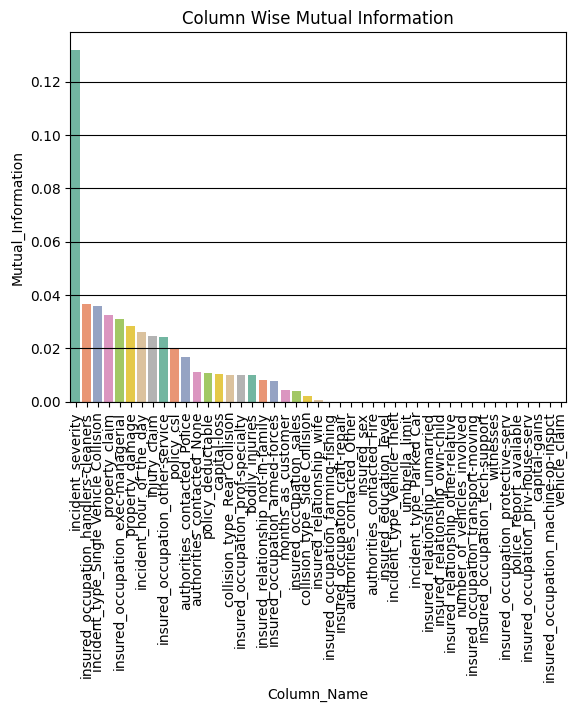

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=gain1,x="Column_Name",y="Mutual_Information",palette="Set2",
            order=gain1.sort_values("Mutual_Information",ascending = False).Column_Name)
plt.xticks(rotation=90)
plt.title("Column Wise Mutual Information")
plt.grid(color="black",axis="y")
plt.xticks(rotation=90)
plt.show()

### 5.4 mutual_info_classif for best k

In [ ]:
from sklearn.feature_selection import SelectKBest
eleven_col=SelectKBest(mutual_info_classif,k=10)
eleven_col.fit(scaled_train,train_y)
train_x.columns[eleven_col.get_support()]

Index(['injury_claim', 'property_claim', 'policy_csl',
       'insured_education_level', 'incident_severity', 'property_damage',
       'insured_occupation_priv-house-serv',
       'insured_occupation_transport-moving', 'insured_relationship_wife',
       'collision_type_Rear Collision'],
      dtype='object')

### 5.5 Seprate high information gain column 

In [ ]:
Scaled_fs_train_data=scaled_train.filter(['incident_severit','bodily_injuries','insured_occupation_sales','property_claim','insured_occupation_farming-fishing','injury_claim','insured_occupation_tech-support','policy_deductable','capital-loss','incident_type_Parked Car','insured_occupation_machine-op-inspct','collision_type_Rear Collision','insured_relationship_wife','insured_relationship_other-relative'],axis=1)
Scaled_fs_train_data

,bodily_injuries,insured_occupation_sales,property_claim,insured_occupation_farming-fishing,injury_claim,insured_occupation_tech-support,policy_deductable,capital-loss,incident_type_Parked Car,insured_occupation_machine-op-inspct,collision_type_Rear Collision,insured_relationship_wife,insured_relationship_other-relative
65,1.271286,-0.292205,-0.128241,-0.227801,1.285251,-0.286794,-1.037803,0.975789,-0.302825,-0.315764,-0.925438,-0.429923,2.236068
244,0.034626,-0.292205,-1.490999,-0.227801,-1.393623,-0.286794,-0.209769,-1.546393,-0.302825,-0.315764,1.080569,-0.429923,2.236068
595,0.034626,-0.292205,-0.203255,4.389792,-1.524700,-0.286794,-1.037803,-0.057480,-0.302825,-0.315764,1.080569,-0.429923,-0.447214
873,-1.202033,-0.292205,0.042625,-0.227801,0.048217,-0.286794,1.446300,-0.674572,-0.302825,-0.315764,1.080569,-0.429923,-0.447214
631,0.034626,-0.292205,-0.540819,-0.227801,0.474215,-0.286794,-0.209769,-0.760678,-0.302825,-0.315764,1.080569,-0.429923,-0.447214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,-1.202033,-0.292205,0.830274,-0.227801,-0.351156,-0.286794,1.446300,-0.183051,-0.302825,-0.315764,-0.925438,-0.429923,2.236068
501,-1.202033,-0.292205,-0.519982,-0.227801,0.515177,3.486817,-0.209769,-0.950828,-0.302825,-0.315764,-0.925438,-0.429923,-0.447214
346,1.271286,-0.292205,-0.186585,-0.227801,-0.177071,-0.286794,-0.209769,-0.595642,-0.302825,3.166925,1.080569,-0.429923,-0.447214
642,1.271286,-0.292205,-0.378288,-0.227801,-0.365493,-0.286794,-0.209769,0.975789,-0.302825,-0.315764,1.080569,-0.429923,-0.447214


In [ ]:
Scaled_fs_test_data=scaled_test.filter(['incident_severit','bodily_injuries','insured_occupation_sales','property_claim','insured_occupation_farming-fishing','injury_claim','insured_occupation_tech-support','policy_deductable','capital-loss','incident_type_Parked Car','insured_occupation_machine-op-inspct','collision_type_Rear Collision','insured_relationship_wife','insured_relationship_other-relative'],axis=1)
Scaled_fs_test_data

,bodily_injuries,insured_occupation_sales,property_claim,insured_occupation_farming-fishing,injury_claim,insured_occupation_tech-support,policy_deductable,capital-loss,incident_type_Parked Car,insured_occupation_machine-op-inspct,collision_type_Rear Collision,insured_relationship_wife,insured_relationship_other-relative
381,-0.061228,-0.270114,-0.297274,-0.261488,0.830272,-0.302825,-1.048430,0.044644,-0.302825,-0.333333,-0.992032,-0.423374,1.951331
732,1.116225,-0.270114,1.447109,-0.261488,-0.057535,-0.302825,1.320012,0.891389,-0.302825,-0.333333,-0.992032,-0.423374,-0.512471
179,1.116225,-0.270114,-1.284120,-0.261488,-1.428292,3.302236,-1.048430,-0.213213,-0.302825,-0.333333,1.008032,2.361980,-0.512471
845,-1.238680,-0.270114,-0.190809,-0.261488,-0.238384,-0.302825,1.320012,0.891389,-0.302825,-0.333333,-0.992032,-0.423374,-0.512471
111,-1.238680,-0.270114,-0.035207,-0.261488,1.356380,-0.302825,-1.048430,-0.460616,-0.302825,-0.333333,-0.992032,-0.423374,-0.512471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-1.238680,-0.270114,-0.241994,-0.261488,0.941248,3.302236,1.320012,-0.070346,-0.302825,-0.333333,1.008032,-0.423374,1.951331
965,-1.238680,-0.270114,0.382462,-0.261488,0.337046,-0.302825,-0.258950,0.891389,-0.302825,-0.333333,-0.992032,-0.423374,1.951331
591,1.116225,-0.270114,2.996989,-0.261488,-0.026708,-0.302825,-1.048430,0.891389,-0.302825,-0.333333,1.008032,-0.423374,-0.512471
176,-0.061228,-0.270114,0.284187,-0.261488,0.238401,-0.302825,-1.048430,0.891389,-0.302825,-0.333333,-0.992032,-0.423374,1.951331


# <font color='red'>6.  Model Selection</font>
#### 1.Logistic Regression
#### 2.Support Vector Machines
#### 3.K-Nearest Neighbours
#### 4.Naïve Bayes
#### 5.Decision Tree Classification
#### 6.Random Forest Classification
#### 7.XGBClassifier
#### 8.ANN

### 6.1 Logistics Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
model_Logi=LogisticRegression()
model_Logi.fit(Scaled_fs_train_data,train_y)
y_Predict_Logi=model_Logi.predict(Scaled_fs_test_data)
y_Predict_Logi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
acc_Lg=accuracy_score(test_y,y_Predict_Logi)
acc_Lg

0.728

### 6.2 Support vector classifier

In [ ]:
# first using the Support vector classifier for model training
from sklearn.svm import SVC
sv_classifier=SVC()

In [ ]:
sv_classifier.fit(Scaled_fs_train_data, train_y)
#y_pred=sv_classifier.predict([[0,0,6240,0,6240,0,2000,0,0,0,0,0,0]])
y_pred=sv_classifier.predict(Scaled_fs_test_data)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acc_svc=accuracy_score(test_y,y_pred)
acc_svc

0.728

### 6.3 K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(Scaled_fs_train_data, train_y)  
#y_predict_knn=classifier.predict([[1,0,5720,0,11440,0,500,-24300,0,0,0,0,1]])
y_predict_knn=classifier.predict(Scaled_fs_test_data)
y_predict_knn

NameError: ignored

In [ ]:
knn_accurancy=accuracy_score(test_y,y_predict_knn)
knn_accurancy

0.664

### 6.4 Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(Scaled_fs_train_data, train_y)  
y_predict_NB=classifier.predict(Scaled_fs_test_data)

In [ ]:
NB_accurancy=accuracy_score(test_y,y_predict_NB)
NB_accurancy

0.68

### 6.5 Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
DT_classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
DT_classifier.fit(Scaled_fs_train_data, train_y) 
y_predict_DT=DT_classifier.predict(Scaled_fs_test_data)

In [ ]:
DT_accurancy=accuracy_score(test_y,y_predict_DT)
DT_accurancy

0.624

### 6.6 Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(Scaled_fs_train_data,train_y)
y_pred_RF=model_rf.predict(Scaled_fs_test_data)

In [ ]:
RF_Accurancy=accuracy_score(test_y,y_pred_RF)
RF_Accurancy

0.704

### 6.7 XGBOOST Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb=XGBClassifier()

In [ ]:
y_pred = xgb.fit(Scaled_fs_train_data, train_y).predict(Scaled_fs_test_data)

In [ ]:
acc_XGB=accuracy_score(test_y,y_pred)
acc_XGB

0.624

### 6.8 ANN

In [ ]:
import numpy as np 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model_ann=Sequential()
model_ann.add(Dense(13,input_dim=13,activation="sigmoid"))
model_ann.add(Dense(13,activation="relu"))
model_ann.add(Dense(13,activation="relu"))
model_ann.add(Dense(13,activation="relu"))
model_ann.add(Dense(1,activation="sigmoid"))

model_ann.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

model_ann.fit(Scaled_fs_train_data,train_y,epochs=10,verbose=1)

Epoch 1/10
24/24 [==============================] - 1s 3ms/step - loss: 0.5839 - accuracy: 0.7627
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7613
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5534 - accuracy: 0.7613
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5519 - accuracy: 0.7613
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7613
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.7613
Epoch 7/10
24/24 [==============================] - 0s 3ms/step - loss: 0.5503 - accuracy: 0.7613
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7613
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7613
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.5496 - accuracy: 0.7613


In [ ]:
y_pred_ANN=model_ann.predict([[1,0,5720,0,11440,0,500,-24300,0,0,0,0,1]])
y_pred_ANN

1/1 [==============================] - 0s 118ms/step


array([[0.41518006]], dtype=float32)

In [ ]:
acc_ANN=model_ann.evaluate(Scaled_fs_test_data,test_y)
acc_ANN

8/8 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.7280


[0.5932963490486145, 0.7279999852180481]

In [ ]:
data={"Accuracy Score":[acc_Lg,acc_svc,knn_accurancy,NB_accurancy,DT_accurancy,RF_Accurancy,acc_XGB,acc_ANN[1]]}

# <font color='red'>7. Results </font>

### 7.1 Create Accurancy value dataframe

In [ ]:
dataframe=pd.DataFrame(data,index=["Logistic Regression",
                                "Support Vector Machine",
                                "K-Nearest Neighbour",
                                "Naive Bayes",
                                "Decision Tree",
                                "Random Forest",
                                "XG Boost",
                                "ANN"])
dataframe

,Accuracy Score
Logistic Regression,0.728
Support Vector Machine,0.728
K-Nearest Neighbour,0.664
Naive Bayes,0.680
Decision Tree,0.624
Random Forest,0.704
XG Boost,0.624
ANN,0.728


### 7.2 Plot Accurancy value 

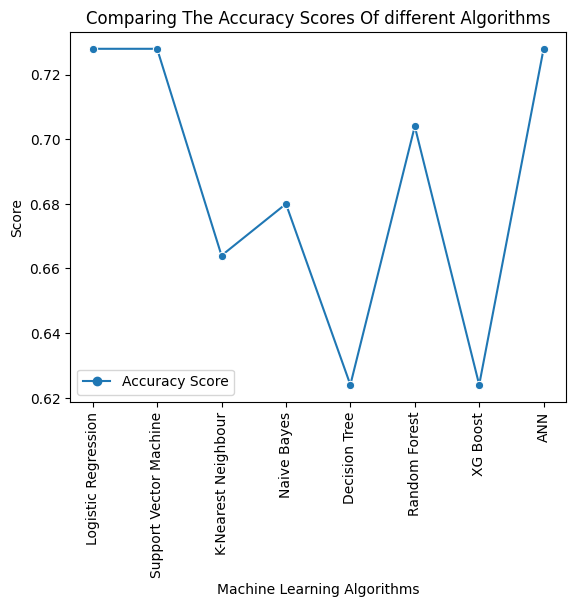

In [ ]:
sns.lineplot(dataframe,markers="o",dashes=True)
plt.xticks(rotation=90)
plt.xlabel("Machine Learning Algorithms")
plt.ylabel("Score")
plt.title("Comparing The Accuracy Scores Of different Algorithms")
plt.show()

### 7.3 Predication 

### SVM

In [ ]:
# we perform 8 classification algorithm in that we got good accurancy for Logistics Regression, SVM, and ANN
#here we use svm for  predication  
y_pred=sv_classifier.predict([[0,0,6240,0,6240,0,2000,0,0,0,0,0,0]])
y_pred

C:\Program Files\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)